# Section 1. Introduction to the Problem/Task and Interpreter System

An Interpreter System is a type of program that executes instructions written in a specific language without needing to be compiled into a machine code. It process commanda line by line or statement by statement providing real-time feedback and execution, dynamic interaction, flexibility, debugging and testing efficiency, making them valuable tools for both development and interactive applications.

For this project, our group chose a Command Interpreter System that serves as a core mechanic of a text-based RPG Poker Game, using commands such as (start, bet, fold, call, all, raise, buy, inspect, play, quit, use, etc.), to manipulate the events within the game. With each command triggering corresponding game functions such as (Starting the game, Betting a certain amount of chips, Forfeiting Hand, etc.). These commands and functions becomes the bridge between user input and in-game outcomes.

The chosen interpreter system was selected due to its capability to facilitate and support interactive gameplay and real-time decision-making, making players engage directly through the system, emphasizing logic and strategy whilst implementing practical applications of interpreter systems in game development, parsing, validating, and executing structured inputs.

The target task of this interpreter is to execute and manage gameplay commands by interpreting textual inputs by the user which is then validated through parameters with command evaluations to detect error inputs by users, and translates them into corresponding events or actions within the game. Through this, the interpreter ensures a smooth command-driven experience, enabling players to progress through increasingly challenging poker battles while managing resources and strategies via intuitive text-based interactions.

In conclusion, our command interpreter system transforms a sequence of user inputs into a proper foundation for an interactive game environment that highlights technical functionality, creative application, and feedback efficiency

# Section 2. Description of the Input Language

The input language of our command interpreter system revolves around a Poker Game RPG elements where players use text-based commands like (start, bet, fold, call, all, raise, buy, inspect, play, quit, use, etc.) to interact and manipulate the game. The language allows players to input basic game actions and special card manipulation commands. The design of our input language is heavily inspired by classic text-based adventure games such as Bookworm Adventures where textual inputs of users are used to progress through levels, trigger sequences, and perform strategic actions. The system solves and improves many features and problems of many traditional command-line games and text adventure games such as providing real-time feedback and execution of commands instead of relying on static, turn-based response or pre-scripted interactions. Creating a dynamic environment and game flow that enhances player immersion through a cause and effect response based on user input and logical applications.

### **Input Language Structure:**

**1. Tokens**

In [1]:
def t_COMMAND(t):
    r'\b(start|bet|fold|call|all|raise|buy|inspect|play|quit|use)\b'
    return t

Command Tokens: The basic commands that manipulate the course of the game's actions

In [2]:
def t_NUMBER(t):
    r'\b\d+\b'
    t.value = int(t.value)
    return t

Number Tokens: Tokenize integers and converts their text to Python ints

In [3]:
def t_ALPHA_VAL(t):
    r'\b[jqka]\b'
    return t

Alpha Val Tokens: Recognizes face-card ranks as tokens

In [4]:
def t_CARD_ID(t):
    r'\b(?:[2-9]|10|[jqka])[hdsc]\b'
    return t

Card ID Tokens: Recognizes playing-card identifiers (suits & values) as tokens

In [5]:
def t_ITEM_ID(t):
    r'\bi\d+\b'
    return t

Item ID Tokens: Recognizes Item Ids as tokens to be bought at the shop or used in the form of community cards

In [6]:
def t_SUIT(t):
    r'\b[hdsc]\b'
    return t

Suit Tokens: Recognizes suit-card ranks as tokens

In [7]:
def t_CHANGE_KEY(t):
    r'\b(suit|value)\b'
    return t

Change key Tokens: Recognizes as tokens and used in special commands to change card suits or values

In [8]:
def t_ACTION(t):
    r'\b(change|reveal|exchange)\b'
    return t

Action Tokens: Recognizes actions as tokens and used in special commands to change card, and reveal or exchange cards of opponents

In [9]:
def t_TO(t):
    r'\bto\b'
    return t

To Token: Emits a To token when it sees an input "To"

In [10]:
def t_OF(t):
    r'\bof\b'
    return t

Of Token: Emits a Of token when it sees an input "Of"

In [11]:
def t_WITH(t):
    r'\bwith\b'
    return t

With Token: Emits a With token when it sees an input "With"

**2. Grammar/Syntax**

Our grammar follows the following structure:

S -> command U | command .                                                                             

U -> number | item_id | card_id A | card_id | card_id to P .

A -> card_id A | card_id .

P -> action | action C | act E | act V.


C -> change_key of card_id K| change_key of card_id .

V -> card_id.

K -> to R .

R -> number | suit | alpha_val .

E -> F with F .

F -> card_id | number.

**3. Valid/Invalid Statements**

Valid Statements are commands that are accepted based on the recognized tokens optionally followed by a syntactically correct target that also passes semantic checks

Examples:

• Basic Commands: Simple commands like bet 100, fold, quit, etc.

In [12]:
from interpreter.tokenizer import lexer
input = "bet 50"
lexer.input(input)
for tok in lexer:
    print(tok)

LexToken(COMMAND,'bet',1,0)
LexToken(NUMBER,50,1,4)


In [14]:
input = "fold"
lexer.input(input)
for tok in lexer:
    print(tok)

LexToken(COMMAND,'fold',1,0)


In [15]:
input = "quit"
lexer.input(input)
for tok in lexer:
    print(tok)

LexToken(COMMAND,'quit',1,0)


• Special Card Commands: Complex actions like use 5h to change suit of 3d to s

In [16]:
input = "use 5h to change suit of 3d to s"
lexer.input(input)
for tok in lexer:
    print(tok)

LexToken(COMMAND,'use',1,0)
LexToken(CARD_ID,'5h',1,4)
LexToken(TO,'to',1,7)
LexToken(ACTION,'change',1,10)
LexToken(CHANGE_KEY,'suit',1,17)
LexToken(OF,'of',1,22)
LexToken(CARD_ID,'3d',1,25)
LexToken(TO,'to',1,28)
LexToken(SUIT,'s',1,31)


Invalid Statements are commands that are not accepted based on the recognized tokens and doesn't follow any syntactically correct target and doesn't pass any semantic checks

Examples:

• Missing Syntax like bet:

In [21]:
from interpreter.core import interpret_command
print(interpret_command("Bet", None))

(False, 'Wrong target on the bet command! Must be a number.')


Semantic error (Invalid Suit):

In [23]:
print(interpret_command("use 5h to change suit of 3d to 5x", None))

(False, "TokError(value='x', position=32)")


Semantic error (Invalid card value):

In [24]:
print(interpret_command("use 5h to change value of 3d to 15", None))

(False, 'Invalid value used in change action')


Lexical Error:

In [25]:
print(interpret_command("bet abc", None))

(False, "TokError(value='c', position=6)")


# Section 3. System Design

Libraries and modules are collection of pre-written code that is designed to be reused, simplifying development and code organization. Within the Poker RPG command interpreter system, they serve the purpose of simplifying tokenizing and parsing, ensuring semantic validation across inputs, handling terminal UI, structure visualization, and game modularization and logic interpreter.

**1. Built-in libraries**

Collection of prewritten codes that are automatically included within the programming language or application, ready-to-use without the need for external installation.

Examples used within the Poker RPG Command Interpreter System:

In [20]:
from dataclasses import dataclass

In [21]:
import curses

In [22]:
from curses import wrapper

In [23]:
import string

In [24]:
from pathlib import Path

**2. Third-party libraries**

Collection of prewritten codes created by other developers or organizations that can be easily integrated within the programming language or application to add functionality without the need to develop it from scratch.

Examples used within the Poker RPG Command Interpreter System:

In [25]:
import ply.yacc as yacc

In [26]:
import ply.lex as lex

**3. Project/local modules**

Customized code units develop to organize, encapsulate, and reuse functionality.

Examples used within the Poker RPG Command Interpreter System:

In [27]:
from poker_game.state import State

In [28]:
from interpreter.parser import parser

In [29]:
from interpreter.tokenizer import lexer

In [30]:
import interpreter.semantic_analyzer as s

In [31]:
import interpreter.tokenizer as t

In [32]:
from interpreter.tokenizer import tokens

In [33]:
import interpreter.parser as p

In [34]:
import ui.layout as layout

In [35]:
import ui.input as input

In [36]:
import poker_game.state

In [37]:
import interpreter.core as core

In [38]:
from interpreter.semantic_analyzer import valid_semantics

In [39]:
from interpreter.core import interpret_command

In [40]:
from ui.terminal import add_terminal_output

In [41]:
import ui.terminal as term

In [42]:
import ui.main_screen as ms

# Section 4. Data Preprocessing and Cleaning

The overall architecture of our interpreter revolves around 3 main components:

**1. Lexer (Tokenizer)**

Converts raw inputs into tokens, and is accepted based on the recognized commands, numbers, card IDs, suits, actions, and keywords whilst handling lexical errors.

**2. Parser**

Uses LALR parsing (parser.out) with PLY to build Abstract Syntax Trees (ASTs) to validate syntax based on the defined grammar rules whilst handling syntax errors.

**3. Executor (Interpreter Engine)**

Semantic Analyzer validates business logic and lets the core interpreter executes valid commands against game state, and returns appropriate responses or error messages

**4. Data Flow Diagram**

In [43]:
def create_data_flow_diagram():
    print("""
    ┌─────────────┐    ┌─────────────┐    ┌─────────────┐    ┌─────────────┐    ┌─────────────┐
    │ Input Text  │──▶ │ Tokenizer   │──▶│   Parser    │──▶│  Semantic   │──▶ │ Game State  │
    │  "bet 50"   │    │  (Lexer)    │    │   (LALR)    │    │  Analyzer   │    │ (Execution) │
    └─────────────┘    └─────────────┘    └─────────────┘    └─────────────┘    └─────────────┘
                                                                                        │
                                                                                        ▼
                                                                                ┌─────────────┐
                                                                                │   Output    │
                                                                                │ "Valid Cmd" │
                                                                                └─────────────┘
    
    Error Paths:
    ┌─────────────┐    ┌─────────────┐    ┌─────────────┐
    │   Lexical   │    │   Syntax    │    │  Semantic   │
    │    Error    │    │    Error    │    │    Error    │
    │  TokError   │    │ "Synt Error"│    │ "Inv Syntax"│
    └─────────────┘    └─────────────┘    └─────────────┘
           ▲                   ▲                   ▲
           │                   │                   │
    ┌─────────────┐    ┌─────────────┐    ┌─────────────┐
    │ Tokenizer   │    │   Parser    │    │  Semantic   │
    └─────────────┘    └─────────────┘    └─────────────┘
    """)

create_data_flow_diagram()


    ┌─────────────┐    ┌─────────────┐    ┌─────────────┐    ┌─────────────┐    ┌─────────────┐
    │ Input Text  │──▶ │ Tokenizer   │──▶│   Parser    │──▶│  Semantic   │──▶ │ Game State  │
    │  "bet 50"   │    │  (Lexer)    │    │   (LALR)    │    │  Analyzer   │    │ (Execution) │
    └─────────────┘    └─────────────┘    └─────────────┘    └─────────────┘    └─────────────┘
                                                                                        │
                                                                                        ▼
                                                                                ┌─────────────┐
                                                                                │   Output    │
                                                                                │ "Valid Cmd" │
                                                                                └─────────────┘

    Error Paths:
    ┌─────────────┐    ┌───────────

**5. Error Handling Strategies**

• Lexical Errors: Handles input mistakes such as invalid characters and command mispositions

• Syntax Errors: Handles spelling mistakes such as malformed commands

• Semantic Errors: Handles logical errors such as invalid game mechanics

**6. Design Justification**

Python Lex-Yacc: Industry-standard parsing library that handles complex grammars efficiently and provides excellent error reporting.

Look-Ahead LR: Balances parsing power with efficiency, suitable for the command language's complexity.

Lexer, Parser, and Executor: Allows independent testing and modification of each component.

Semantic Validation: Ensures game integrity by validating business rules beyond syntax

# Section 5. Implementation Details

In this section, we will be explaining the step-by-step implementation of our interpreter. On how we identify and categorize tokens, up to how the system responds to invalid inputs

**1. Lexer**

We start the process by importing the necessary libraries and modules and handling the following dataclass to represent the tokenization errors when an invalid characters doesn't match any defined token patters

In [44]:
import ply.lex as lex
from dataclasses import dataclass


@dataclass
class TokError:
    value: object
    position: int

error = None
error_found = False

Then we declare the token definitions that will serve as the commands and valid inputs to change the game's actions

In [45]:
tokens = (
    'COMMAND',
    'NUMBER',
    'ALPHA_VAL',
    'CARD_ID',
    'ITEM_ID',
    'SUIT',
    'CHANGE_KEY',
    'ACTION',
    'TO',
    'OF',
    'WITH',
)

Then we declare the token recognition functions, which are necessary so that these tokens can return to the parser for further processing

In [46]:
def t_COMMAND(t):
    r'\b(start|bet|fold|call|all|raise|buy|inspect|play|quit|use)\b'
    return t

def t_NUMBER(t):
    r'\b\d+\b'
    t.value = int(t.value)
    return t

def t_ALPHA_VAL(t):
    r'\b[jqka]\b'
    return t

def t_CARD_ID(t):
    r'\b(?:[2-9]|10|[jqka])[hdsc]\b'
    return t

def t_ITEM_ID(t):
    r'\bi\d+\b'
    return t


def t_SUIT(t):
    r'\b[hdsc]\b'
    return t

def t_CHANGE_KEY(t):
    r'\b(suit|value)\b'
    return t


def t_ACTION(t):
    r'\b(change|reveal|exchange)\b'
    return t


def t_TO(t):
    r'\bto\b'
    return t

def t_OF(t):
    r'\bof\b'
    return t

def t_WITH(t):
    r'\bwith\b'
    return t

Then we have a code block that handles the input function and prints the characters that are converted into recognizable tokens

In [13]:
#Test case for tokenizer.py
import builtins
from src.interpreter.tokenizer import lexer

if __name__ == "__main__":
    data = builtins.input("Enter command: ")
    lexer.input(data)
    for tok in lexer:
        print(tok)

LexToken(COMMAND,'buy',1,0)
LexToken(NUMBER,10923,1,4)


**2. Parser**

The process starts similarly at first by importing the necessary libraries and modules for taking input data and transforming them into a structured format that the interpreter can understand

In [48]:
from ply.lex import LexToken
from interpreter.tokenizer import tokens
import ply.yacc as yacc
from dataclasses import dataclass

Then we create the Abstract Syntax Trees (AST) that will serve as the representation of the parsed commands

In [49]:
@dataclass
class Command:
    command: str
    target: object = None


@dataclass
class Number:
    num: int


@dataclass
class AlphabetValue:
    value: str


@dataclass
class Suit:
    value: str


@dataclass
class ItemID:
    item: str


@dataclass
class CardID:
    value: str


@dataclass
class Action:
    action: str
    target: object = None


@dataclass
class SpecialCardCommand:
    special_card: CardID
    action: Action


@dataclass
class ChangeTarget:
    change_key: str
    card_id: CardID
    change_value: str = 'random'


@dataclass
class ExchangeTarget:
    target1: object
    target2: object

Then we implement the grammar rule functions that handle the parsing logic for our Poker RPG interpreter

In [50]:
def p_s1(p):
    'S :  COMMAND U'
    p[0] = Command(command=p[1], target=p[2])


def p_s2(p):
    'S : COMMAND'
    p[0] = Command(command=p[1])


def p_u1(p):
    'U : NUMBER'
    p[0] = Number(p[1])


def p_u2(p):
    'U : ITEM_ID'
    p[0] = ItemID(p[1])


def p_u3(p):
    'U : CARD_ID A'
    p[0] = [CardID(value=p[1])] + p[2]


def p_u4(p):
    'U : CARD_ID'
    p[0] = CardID(value=p[1])


def p_u5(p):
    'U : CARD_ID TO P'
    p[0] = SpecialCardCommand(CardID(p[1]), p[3])


def p_a1(p):
    'A : CARD_ID A'
    p[0] = [CardID(value=p[1])] + p[2]


def p_a2(p):
    'A : CARD_ID'
    p[0] = [CardID(value=p[1])]


def p_p1(p):
    'P : ACTION'
    p[0] = Action(action=p[1])


def p_p2(p):
    'P : ACTION C'
    p[0] = Action(action=p[1], target=p[2])


def p_p3(p):
    'P : ACTION E'
    p[0] = Action(action=p[1], target=p[2])


def p_p4(p):
    'P : ACTION V'
    p[0] = Action(action=p[1], target=p[2])


def p_c1(p):
    'C : CHANGE_KEY OF CARD_ID K'
    p[0] = ChangeTarget(change_key=p[1], card_id=CardID(value=p[3]), change_value=p[4])


def p_c2(p):
    'C : CHANGE_KEY OF CARD_ID'
    p[0] = ChangeTarget(change_key=p[1], card_id=CardID(value=p[3]))


def p_k(p):
    'K : TO R'
    p[0] = p[2]


def p_r1(p):
    'R : NUMBER'
    p[0] = Number(num=p[1])


def p_r2(p):
    'R : SUIT'
    p[0] = Suit(value=p[1])


def p_r3(p):
    'R : ALPHA_VAL'
    p[0] = AlphabetValue(value=p[1])


def p_e(p):
    'E : F WITH F'
    p[0] = ExchangeTarget(p[1], p[3])


def p_f1(p):
    'F : NUMBER'
    p[0] = Number(num=p[1])


def p_f2(p):
    'F : CARD_ID'
    p[0] = CardID(value=p[1])


def p_v(p):
    'V : NUMBER'
    p[0] = Number(num=p[1])

Lastly, we create the parser object that will parse the user input into the Abstract Syntax Tree (AST)

In [51]:
#Test Case for parser.py
import sys
from io import StringIO
from src.interpreter.parser import parser
debug_output = StringIO()
sys.stdout = debug_output
command = "bet 100"
ast = parser.parse(command)
sys.stdout = sys.__stdout__
print("Debug output:")
print(debug_output.getvalue())
print(f"AST: {ast}")

**3. Executor**

The process starts by importing the necessary libraries and modules for command validation to modify the game state

In [52]:
from poker_game.state import State
from interpreter.parser import parser
from interpreter.tokenizer import lexer
import interpreter.semantic_analyzer as s
import interpreter.tokenizer as t
import poker_game.commands as commands
import poker_game.special_commands as special_commands

Then we tokenize the inputs which will then parse them into ASTs, and we validate the semantics before executing the commands

In [53]:
def interpret_command(input: str, state: State):
    input = input.lower()

    lexer.input(input)

    ast = parser.parse(input)
    valid = s.valid_semantics(ast)

    if not valid[0]:
        return valid[1]

    command = ast.command

    match command:
        case "start":
            commands.Start(state)
            return f"Game Started is {state.started}"
        case _:
            # if tapos na lahat ng commands, dapat unreachble toh
            return "Unknown Valid Command"

# Section 6. Testing with Valid and Invalid Inputs

In this section, we will be demonstrating how our interpreter works by running a variety of test cases

### Section 6.1 Valid Commands

**1. Import Libraries and Modules**

In [54]:
from interpreter.tokenizer import lexer
from interpreter.parser import parser

**2. Basic Commands**

In [55]:
lexer.input('raise 1500')
for tok in lexer:
    print(tok)

**3. Special Commands**

In [56]:
out = parser.parse('use 5h to reveal 0')
print(out)

**4. Abstract Syntax Trees Visualization**

In [11]:
from interpreter.tokenizer import lexer
from interpreter.parser import parser
from graphviz import Digraph
import interpreter.parser as p

def create_ast(out):

    dot = Digraph('Abstract Syntax Tree') 
    
    nodes = []
    edges = []
    
    nodes.append(out.command)
    
    if out.target:
        t = out.target
        if type(t) == list:
            for i, card in enumerate(t):
                nodes.append(card.value + str(i))
                edges.append((out.command, card.value + str(i)))
        if type(t) == p.Number:
            nodes.append(str(t.num))
            edges.append((out.command, str(t.num)))
        if type(t) == p.CardID:
            nodes.append(str(t.value))
            edges.append((out.command, str(t.value)))
        if type(t) == p.ItemID:
            nodes.append(str(t.item))
            edges.append((out.command, str(t.item)))
        if type(t) == p.SpecialCardCommand:
            a = t.action.action + "\n" + t.special_card.value
            nodes.append(a)
            edges.append((out.command, a))
            at = t.action.target
            if at:
                if type(at) == p.ChangeTarget:
                    nodes.append("change_key\n " + at.change_key)
                    edges.append((a, "change_key\n " + at.change_key))
                    edges.append((a, "card\n " + str(at.card_id)))
                    if type(at.change_value) == p.Number:
                        nodes.append("change_value\n " + str(at.change_value.num))
                        edges.append((a, "change_value\n " + str(at.change_value.num)))
                    if type(at.change_value) == p.AlphabetValue or type(at.change_value) == p.Suit:
                        nodes.append("change_value\n " + str(at.change_value.value))
                        edges.append((a, "change_value\n " + str(at.change_value.value)))
    
                if type(at) == p.ExchangeTarget:
                    def target_value(target):
                        if type(target) == p.Number:
                            return str(target.num)
                        if type(target) == p.CardID:
                            return target.value
                    nodes.append("target 1\n " + target_value(at.target1))
                    edges.append((a, "target 1\n " + target_value(at.target1)))
                    nodes.append("target 2\n " + target_value(at.target2))
                    edges.append((a, "target 2\n " + target_value(at.target2)))
                    
                
    
    for node in nodes:
        dot.node(node, node)
    
    for src, dst in edges:
        dot.edge(src, dst)
    
    return dot

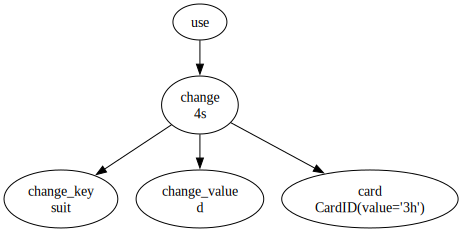

In [58]:
out = parser.parse('use 4s to change suit of 3h to d')
create_ast(out)

### Section 6.2 Invalid Commands

**1. Missing Syntax**

In [3]:
print(interpret_command("Raise", None))

Invalid raise command


**2. Semantic Error**

In [5]:
print(interpret_command("Use 5h to exchange 5 with 4s", None))

Exchange target must be an integer between 0 and 4


**3. Lexical Error**

In [9]:
print(interpret_command("buy abc", None))

TokError(value='c', position=6)


### Section 6.3 How these test cases proved the correctness and robustness of your interpreter

Test cases like these are important for validating the functionality and application of the interpreter, additionally, it also validates the following:

• Tests invalid characters and token recognition

• Tests grammar rule violations and abnormal structures

• Tests logical errors in valid syntax

• Ensures commands work regardless of input cases

• Verifies actions within the game

# Section 7. Extensions and Additional Features

# Section 8. Insights and Conclusions

# Section 9. References

GeeksforGeeks. (2022, February 16). PLY (Python lex-Yacc) - An Introduction. GeeksforGeeks, Sanchhaya Education Private Limited. https://www.geeksforgeeks.org/python/ply-python-lex-yacc-an-introduction/

GeeksforGeeks. (2025, July 11). Data Classes in Python | An Introduction. GeeksforGeeks, Sanchhaya Education Private Limited. https://www.geeksforgeeks.org/python/data-classes-in-python-an-introduction/

GeeksforGeeks. (2025, July 23). Python String Module. GeeksforGeeks, Sanchhaya Education Private Limited. https://www.geeksforgeeks.org/python/python-string-module/

GeeksforGeeks. (2025, October 1). Python curses Module. GeeksforGeeks, Sanchhaya Education Private Limited. https://www.w3schools.com/Python/ref_module_curses.asp

GeeksforGeeks. (2025, September 8). Pathlib module in Python. GeeksforGeeks, Sanchhaya Education Private Limited. https://www.geeksforgeeks.org/python/pathlib-module-in-python/

Jade, E. (2024, July 13). Step-by-Step: Building a Lexer in Java for Tokenizing Source Code. Medium. https://medium.com/@enzojade62/step-by-step-building-a-lexer-in-java-for-tokenizing-source-code-ac4f1d91326f

Python. (2022, March 10). tomllib — Parse TOML files. The Python Software Foundation. https://docs.python.org/3/library/tomllib.html

Python. (2025, March 23). token — Constants used with Python parse trees. The Python Software Foundation. https://docs.python.org/3/library/token.html